# **Übung 5: Der Tragflügel in Rollbewegung**

In [1]:
# Importieren von Python-Biblioteken
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, VBox, HBox, Label
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets

# Erhöhen der Plot-Auflösung
plt.rcParams["figure.dpi"] = 140

### **5.1.1 Visualisierung: Rechteckflügel mit Querrudern**

In [2]:
def rechteckfluegel(AR, xi, l_i, l_a):
    """Generiert die Planform eines Rechteckflügels mit Rudern"""
    
    b = l_a * AR
    s = b / 2
    l_i = l_a

    # ruderbreite und -tiefe 
    y_ruder = 0.65 * s
    x_ruder = 0.8 * l_i
    rudertiefe = l_i - x_ruder
    
    # Flügelpunkte
    points_fluegel = np.array([
        [0, 0], [s, 0], [s, x_ruder], [y_ruder, x_ruder], 
        [y_ruder, l_a], [-y_ruder, l_a], [-y_ruder, x_ruder], [-s, x_ruder], [-s, 0], [0, 0]
    ])
    points_fluegel = [np.append(pt, 0) for pt in points_fluegel]
    
    # Ruderpunkte links
    ruder_links = np.array([
        [y_ruder, x_ruder, 0], [s, x_ruder, 0], 
        [s, x_ruder + rudertiefe * np.cos(np.radians(xi)), +rudertiefe * np.sin(np.radians(xi))], 
        [y_ruder, x_ruder + rudertiefe * np.cos(np.radians(xi)), +rudertiefe * np.sin(np.radians(xi))],
        [y_ruder, x_ruder, 0]
    ])
    
    # Ruderpunkte rechts
    ruder_rechts = np.array([
        [-y_ruder, x_ruder, 0], [-s, x_ruder, 0], 
        [-s, x_ruder + rudertiefe * np.cos(np.radians(xi)), -rudertiefe * np.sin(np.radians(xi))], 
        [-y_ruder, x_ruder + rudertiefe * np.cos(np.radians(xi)), -rudertiefe * np.sin(np.radians(xi))],
        [-y_ruder, x_ruder, 0]
    ])
    
    return points_fluegel, ruder_links, ruder_rechts

def plot_rechteckfluegel(AR, xi, l_i=1.0, l_a=1.0):
    """Plottet die Planform eines Rechteckflügels mit verstellbaren Rudern"""
    
    points_fluegel, ruder_links, ruder_rechts = rechteckfluegel(AR, xi, l_i, l_a)

    fig = plt.figure(figsize=(5, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Flügel und Ruder plotten
    ax.add_collection3d(Poly3DCollection([points_fluegel], color="black", alpha=0.6))
    ax.add_collection3d(Poly3DCollection([ruder_links], color="lightcoral", alpha=0.6))
    ax.add_collection3d(Poly3DCollection([ruder_rechts], color="lightcoral", alpha=0.6))
    
    # Achsen, Gitter und Hintergrund entfernen; Perspektive einstellen
    ax.set_axis_off() 
    ax.set_facecolor('white')
    ax.view_init(elev=30, azim=45)

    plt.gca().set_aspect('equal')
    plt.show()

def widget_rechteckfluegel():
    """Erzeugt ein Widget, mit dem sich die Planform eines Rechteckflügels mit verstellbaren Rudern visualisieren lässt"""

    slider_AR = VBox([Label('Streckung'), IntSlider(value=8, min=5, max=20, step=1)])
    slider_xi = VBox([Label('Klappenwinkel [°]'), IntSlider(value=15, min=-30, max=30, step=1)])
    
    ui = VBox([slider_AR,  slider_xi])
    out = widgets.interactive_output(plot_rechteckfluegel, {'AR': slider_AR.children[1], 'xi': slider_xi.children[1]})

    # Layout anpassen
    out.layout = widgets.Layout(width='70%')
    ui.layout = widgets.Layout(width='30%')
    return HBox([out, ui], layout=widgets.Layout(justify_content='center', align_items='center', width='100%'))

In [3]:
widget_rechteckfluegel()

### **5.1.2 Geometrische Parameter und Randbedinungen**

In [4]:
# Konstant
alpha = 0                       # Anstellwinel [deg]
alpha = alpha / 180 * np.pi     # Anstellwinel [rad]  
U_inf = 10.0                    # Anströmgeschwindigkeit [m/s]
rho = 1.225                     # Dichte [kg/m^3]
l_i = 1.0                       # Flügeltiefe Rumpfmitte [m]
l_a = 1.0                       # Flügeltiefe außen [m]
l_r = 0.2                       # Rudertiefe [m]

# 🟠

In [5]:
# Diese Parameter können verändert werden
AR = 10                         # Streckung/ Aspect Ratio
xi = 30                         # Klappenwinkel [deg]
omega = 1                       # dimensionslose Rollgeschwindigkeit

#### Berechnung weiterer geometrischer Parameter

In [6]:
# Berechnung der Halbspannweite
b = (l_i + l_a) * AR / 2
s = b / 2 

# Berechnung der Flügelfläche aus Halbspannweite und Flügeltiefen
S = b/2 * (l_a + l_i)       

# Verhältnis Rudertiefe-Flügeltiefe und spannweitige Position
lamda = l_r / l_i
y_ruder = 0.65 * s

# Berechnung des Nullanstellwinkels des Klappenprofils
xi = xi * np.pi / 180
alpha_0 = - 2 / np.pi * (np.asin(np.sqrt(lamda)) + np.sqrt(lamda * (1 - lamda))) * xi

# Berechnung der Breite eines Elementarflügels
N = 500
delta_b = b/ N

print("Halbspannweite:                          ", "%.2f" % s, "m")
print("Spannweitige Position der Ruder:         ", "%.3f" % y_ruder, "m")
print("Nullanstellwinkel des Klappenprofils:    ", str(round(alpha_0 * np.pi / 180, 4)) + "°")

Halbspannweite:                           5.00 m
Spannweitige Position der Ruder:          3.250 m
Nullanstellwinkel des Klappenprofils:     -0.005°


### **5.1.3 Berechnung der Hufeisenwirbel-Koordinaten**

In [7]:
def x_position(y, l_i, l_a, s, aufpunkt=False):
    """Berechnet die Tiefenposition der Punkte A und B und des Aufpunkts C"""

    tiefe = 0.75 if aufpunkt else 0.25
    return abs(y) / s * (l_i - l_a) / 2 + tiefe * (l_i - abs(y) / s * (l_i - l_a))


def compute_coords(s, N, delta_b, l_i, l_a):
    """Berechnet die Hufeisenwirbel-Koordinaten aus Basis der Flügelgeometrie und Anzahl der Elementarflügel"""

    # Spannweitige Positionen der Punkte A, B und Aufpunkt C
    y_a = np.array([-s +  j    * delta_b for j in range(N)])
    y_b = np.array([-s + (j+1) * delta_b for j in range(N)])
    y_c = np.array([-s + delta_b/2 + i*delta_b for i in range(N)])
    
    # Tiefenposition der Punkte A und B und des Aufpunkts C
    x_a = np.array([x_position(y_i, l_i, l_a, s) for y_i in y_a])
    x_b = np.array([x_position(y_i, l_i, l_a, s) for y_i in y_b])
    x_c = np.array([x_position(y_i, l_i, l_a, s, True) for y_i in y_c])

    # Spannweitige Positionen der bis ins Unendliche reichenden nichttragenden Wirbel
    y_aoo = np.array([-s +  j    * delta_b for j in range(N)])
    y_boo = np.array([-s + (j+1) * delta_b for j in range(N)])

    # Tiefenposition der bis ins Unendliche reichenden nichttragenden Wirbel
    x_aoo = x_a + 100*s
    x_boo = x_b + 100*s

    return y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo


# Berechnen aller Hufeisenwirbel-Koordinaten
y_a, y_b, y_c, x_a, x_b, x_c, y_aoo, y_boo, x_aoo, x_boo = compute_coords(s, N, delta_b, l_i, l_a)

### **5.1.4 Berechnung der Koeffizientenmatrix**

In [8]:
def compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c):
    """Berechnet die drei Anteile der Koeffizientenmatrix"""
    
    # Initialisieren der Matrizen
    a_AB = np.zeros((x_a.size, x_a.size))
    a_Aoo = np.zeros((x_a.size, x_a.size))
    a_Boo = np.zeros((x_a.size, x_a.size))

    # Berechnen der Anteile der gebundenen Wirbel
    for j in range(N):
        for i in range(N):
            a_AB[i, j] = 1 / (4*np.pi) * (1/((x_c[i] - x_a[j])*(y_c[i] - y_b[j]) - (y_c[i] - y_a[j])*(x_c[i] - x_b[j]))) * (((x_b[j] - x_a[j])*(x_c[i] - x_a[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_a[j]))/ np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2) - ((x_b[j] - x_a[j])*(x_c[i] - x_b[j]) + (y_b[j] - y_a[j])*(y_c[i] - y_b[j]))/ np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2))

    # Berechnen der Anteile der freien Wirbel der linken Seite
    for j in range(N):
        for i in range(N):
            a_Aoo[i, j] = 1 / (4*np.pi) * 1/(y_a[j] - y_c[i]) * ((x_c[i] - x_a[j])/ (np.sqrt((x_c[i] - x_a[j])**2 + (y_c[i] - y_a[j])**2)) + 1)

    # Berechnen der Anteile der freien Wirbel der rechten Seite
    for j in range(N):
        for i in range(N):
            a_Boo[i, j] = 1 / (4*np.pi) * 1/(y_b[j] - y_c[i]) * ((x_c[i] - x_b[j])/ (np.sqrt((x_c[i] - x_b[j])**2 + (y_c[i] - y_b[j])**2)) + 1)
    
    return a_AB, a_Aoo, a_Boo

In [9]:
def compute_forces_coeffs(alpha_g, a, s):
    """ Berechnet Kräfte und Beiwerte """
    
    for i in range(alpha_g.shape[0]):
        if y_c[i] < -y_ruder:
            alpha_g[i] += alpha_0
        elif y_c[i] > y_ruder:
            alpha_g[i] -= alpha_0

    # dimensionslose Position der Aufpunkte
    eta = y_c / s

    # Berechnung der Ruder- und Rollwirbelstärken
    Gamma_ruder = np.linalg.solve(a, alpha_g * (- U_inf)) 
    Gamma_rollen = np.linalg.solve(a, eta * omega * (- U_inf)) 

    # Berechnen der Auftriebsanteile und zugehörigen Beiwerte
    A_i_ruder = rho * delta_b * U_inf * Gamma_ruder
    A_i_rollen = rho * delta_b * U_inf * Gamma_rollen
    A_i = A_i_ruder + A_i_rollen

    # Berechnen der Rollmomente und zugehörigen Beiwerte
    rollmoment_ruder = np.sum(-y_c * A_i_ruder)
    rollmoment = np.sum(-y_c * A_i_rollen)

    C_L_ruder = 2*rollmoment_ruder / rho / U_inf**2 / S / s
    C_L_rollen = 2*rollmoment / rho / U_inf**2 / S / s

    return C_L_ruder, C_L_rollen, A_i

In [10]:
# Berechnen der Anteile der Koeffizientenmatrix
a_AB, a_Aoo, a_Boo = compute_coeff_matrices(y_a, y_b, y_c, x_a, x_b, x_c)

a = a_AB + a_Aoo - a_Boo                                # Koeffizientenmatrix
alpha_g = np.full((a.shape[0]), alpha, dtype=float)     # Anstellwinkelvektor

### **5.1.5 Berechnen von Kräften, Momenten und Beiwerten**

In [11]:
C_L_ruder, C_L_rollen, A_i = compute_forces_coeffs(alpha_g, a, s)

# Berechnen der Rollgeschwindigkeit
Omega_max = C_L_ruder / C_L_rollen
omega_x = Omega_max / s * U_inf * 180 / np.pi

print("Dimensionslose Rollgeschwindigkeit:          ", "%.3f" % Omega_max)
print("Dimensionsbehaftete Rollgeschwindigkeit:     ", "%.2f" % omega_x, "°/s")

Dimensionslose Rollgeschwindigkeit:           0.225
Dimensionsbehaftete Rollgeschwindigkeit:      25.83 °/s


#### Auftriebsverteilung

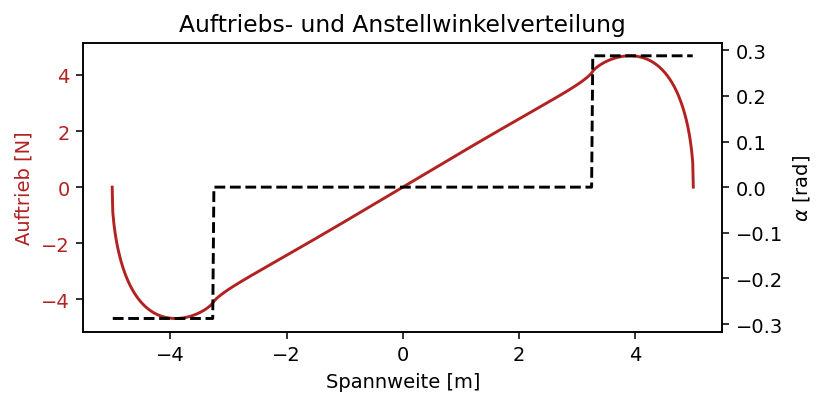

In [12]:
# Hinzufügen von Endpunkten zum plotten
A_i = np.insert(A_i, 0, 0)
A_i = np.append(A_i, 0)
y_c = np.insert(y_c, 0, -s)
y_c = np.append(y_c, s)

fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot der Auftriebsverteilung
ax1.plot(y_c, A_i, '-', color="firebrick", label='Auftriebsverteilung')
ax1.set_xlabel('Spannweite [m]')
ax1.set_ylabel(r'Auftrieb [N]', color='firebrick')
ax1.tick_params(axis='y', labelcolor='firebrick')

# Erstellen einer zweiten y-Achse (Anstellwinkel)
ax2 = ax1.twinx()
ax2.plot(y_c[1:-1], alpha_g, '--', color="black", label='Anstellwinkelverteilung')
ax2.set_ylabel(r'$\alpha$ [rad]', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Auftriebs- und Anstellwinkelverteilung')
fig.tight_layout()
plt.show()